# Assignment 1

The idea of my project is to compare works from writers who are one century apart. The two works from the same author sets a basis for what kind of vocabulary is used by that author in that century. Then, by comparing the work of two separate authors, we are able to see how vocabulary has changed within the one hundred year span. Perhaps it is rather similar or perhaps it has changed drastically.

1. Compare word frequencies between two works of a single author.
    * Jacob Grimm: Little Red Riding Hood and Rapunzel
1. Compare word frequencies between works of two authors.
    * Analysis from Jacob Grimm and The Wonderful Wizard of Oz
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors? 

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

<BarContainer object of 20 artists>

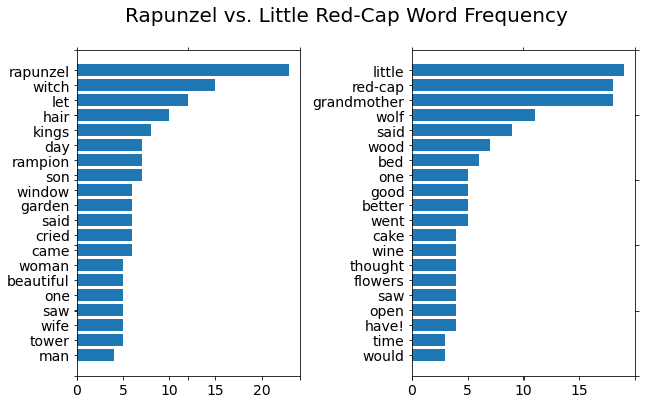

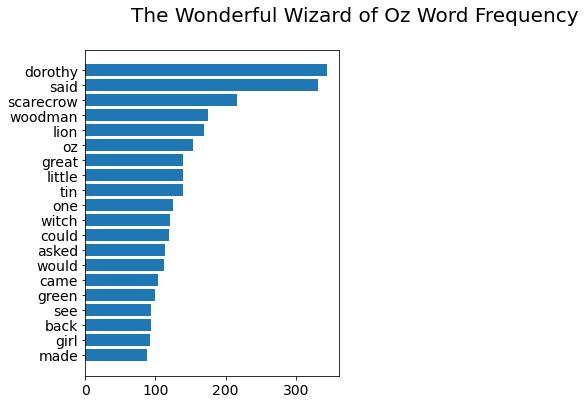

In [117]:
import requests, re, nltk
from bs4 import BeautifulSoup
from collections import Counter
import operator
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline

stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

grimm = requests.get('https://www.gutenberg.org/files/52521/52521-0.txt')
twwoo = requests.get('https://www.gutenberg.org/files/55/55-0.txt')


#1. parse text so only the book text is in the .text section (rather than including all logistic text)
grimm = BeautifulSoup(grimm.text.lower(), 'html.parser')
grimm = grimm.get_text()
twwoo = BeautifulSoup(twwoo.text.lower(), 'html.parser')
twwoo = twwoo.get_text()
rpnzl = grimm[grimm.find("rapunzel", 25300) : grimm.find("[illustration]", 25301)]
lrrh = grimm[grimm.find("little red-cap", 185520) : grimm.find("[illustration]", 185521)]
twwoo = twwoo[twwoo.find("the wonderful wizard of oz", 3200) : twwoo.find("*** end of the project gutenberg ebook the wonderful wizard of oz ***")-1]

rpnzl = re.sub('[,"\.\'&\|_â:@>*;/=]', "", rpnzl)
rpnzl = re.sub('^[0-9\.]*$', "", rpnzl)
lrrh = re.sub('[,"\.\'&\|_â:@>*;/=]', "", lrrh)
lrrh = re.sub('^[0-9\.]*$', "", lrrh)
twwoo = re.sub('[,"\.\'&\|_â:@>*;/=]', "", twwoo)
twwoo = re.sub('^[0-9\.]*$', "", twwoo)


#2. analyze word frequency of each Grimm fairytale
rapunzelArr = re.split('\s+', rpnzl)
littleredArr = re.split('\s+', lrrh)

rpnzlDict = Counter(rapunzelArr)
lrrhDict = Counter(littleredArr)

for i in stop_words:
    rpnzlDict.pop(i, None)
    lrrhDict.pop(i, None)

rpnzlDict = sorted (rpnzlDict.items(), key = operator.itemgetter(1), reverse=True)
rpnzlDict = rpnzlDict[:20]
rpnzlDict = rpnzlDict[::-1]
lrrhDict = sorted (lrrhDict.items(), key = operator.itemgetter(1), reverse=True)
lrrhDict = lrrhDict[:20]
lrrhDict = lrrhDict[::-1]


#3. find the words in-common in Grimm Fairytales
grimmCommon = []
for i in rpnzlDict:
    for j in lrrhDict:
        if i[0] == j[0]:
            grimmCommon.append(i[0])


#4. analyze word frequency in The Wonderful Wizard of Oz
wizardArr = re.split('\s+', twwoo)
twwooDict = Counter(wizardArr)
for i in stop_words:
    twwooDict.pop(i, None)

twwooDict = sorted (twwooDict.items(), key = operator.itemgetter(1), reverse=True)
twwooDict = twwooDict[:20]
twwooDict = twwooDict[::-1]


#5. find the words in-common between The Wonderful Wizard of Oz and Grimm Farytales
authCommon = []
for i in grimmCommon:
    for j in twwooDict:
        if i == j[0]:
            authCommon.append(i)


#6. plot results
sa = plt.figure(figsize=(10, 6))
sa.suptitle ("Rapunzel vs. Little Red-Cap Word Frequency", fontsize=20)
ax = sa.add_subplot(111)
ax.spines ['top'] .set_color ('none')
ax.spines ['bottom'] .set_color ('none')
ax.spines ['left'] .set_color ('none')
ax.spines ['right'] .set_color ('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

ax1 = sa.add_subplot(121)
plt.subplots_adjust(wspace=.5)

pos = np.arange(len(rpnzlDict)) 
ax1.tick_params(axis='both', which='major', labelsize=14)
pylab.yticks(pos, [ x [0] for x in rpnzlDict ])
ax1.barh(range(len(rpnzlDict)), [ x [1] for x in rpnzlDict ], align='center')

ax2 = sa.add_subplot(122)
ax2.tick_params(axis='both', which='major', labelsize=14)
pos = np.arange(len(lrrhDict)) 
pylab.yticks(pos, [ x [0] for x in lrrhDict ])
ax2.barh(range (len(lrrhDict)), [ x [1] for x in lrrhDict ], align='center')


da = plt.figure(figsize=(10, 6))
da.suptitle ("The Wonderful Wizard of Oz Word Frequency", fontsize=20)
ax.spines ['top'] .set_color ('none')
ax.spines ['bottom'] .set_color ('none')
ax.spines ['left'] .set_color ('none')
ax.spines ['right'] .set_color ('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

ax1 = da.add_subplot(121)

pos = np.arange(len(twwooDict)) 
ax1.tick_params(axis='both', which='major', labelsize=14)
pylab.yticks(pos, [ x [0] for x in twwooDict ])
ax1.barh(range(len(twwooDict)), [ x [1] for x in twwooDict ], align='center')




In [119]:
print("Words in common in the two Grimm Fairytale stories:")
for i in grimmCommon:
    print(i)
print("\n")

print("Words in common between the two authors:")
for i in authCommon:
    print(i)

Words in common in the two Grimm Fairytale stories:
saw
one
said


Words in common between the two authors:
one
said
